<img src='salmao.jpg'>

[Vídeo](https://www.youtube.com/watch?v=3OJEae7Qb_o)

A Swedish Fish Incorporated é a maior empresa sueca que fornece peixe por correspondência. Eles estão agora tentando entrar no lucrativo mercado dinamarquês vendendo assinaturas de um ano de salmão. O departamento de marketing fez um estudo piloto e tentou o seguinte método de marketing:

R: Enviando um e-mail com um folheto colorido que convida as pessoas a se inscreverem para uma assinatura de um ano de salmão.

O departamento de marketing enviou 16 e-mails de tipo A. Seis dinamarqueses que receberam um e-mail assinado por um ano de salmão e o departamento de marketing quer saber agora o quão bom é o método A?


### I) Construa um modelo Bayesiano que responda à pergunta: Qual seria a taxa de inscrição se o método A fosse usado em um número maior de pessoas? ###


In [1]:
# 6 pessoas de 16 se inscreveram para receber o salmão
# ou seja

p <- 6/16
p

[1] 0.375

In [2]:
# Podemos admitir, a priori, que esse seja a verdadeira proporção, p = 37,5%,
# caso tivéssemos um número bem maior de pessoas que recebessem o e-mail. Mas será mesmo?

In [4]:
# Uma pessoa aceitar ou não se inscrever são
# ensaios de Bernoulli: aceitar = sucesso, rejeitar = fracasso.
# Podemos então usar um modelo binomial de parâmetros n = 16
# e um p qualquer. Esse p qualquer pode ser gerado por
# um outro modelo como a Distribuição Uniforme, que
# fornecerá nosso parâmero p a priori. 

# temos guardado aqui 100 mil valores para p
# de uma distribuição uniforme, ou seja, qualquer 
# valor tem mesma probabilidade de ser escolhido
parametros_p <- runif(0, 1, n = 100000 ) 

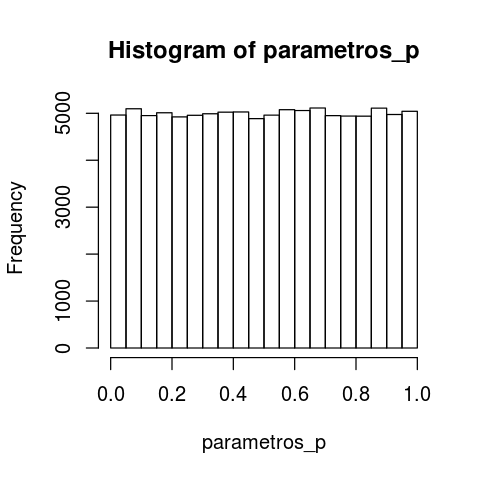

In [5]:
# sempre bom dar uma olhada no na distribuição dos valores gerados
# só pra ter certeza que segue o jeitão da distribuição em 
# que tiramos uma amostra de 100 mil valores para p
# no caso, uma Distribuição Uniforme.

options(repr.plot.width=4, repr.plot.height=4)
hist(parametros_p) 

In [22]:
# Vamos agora gerar valores
# simulados para quantidade de pessoas
# que aceitariam se inscrever
# com sucesso p e n=16

dados_simulados <- rep(NA, 100000)
for( i in 1:100000){
    p <- parametros_p[i]
    dados_simulados[i] = rbinom(n = 1, size = 16, prob = p)
}

In [23]:
# vamos filtrar para pegar só aqueles parâmetros
# que corraborem com o que vimos, ou seja,
# que tenha gerado 6 "pessoas inscritas". 
posteriori <- parametros_p[dados_simulados == 6]

In [24]:
# essa é a quantidade de parâmetros 
# que forneceu o valor 6
length(posteriori)

[1] 5907

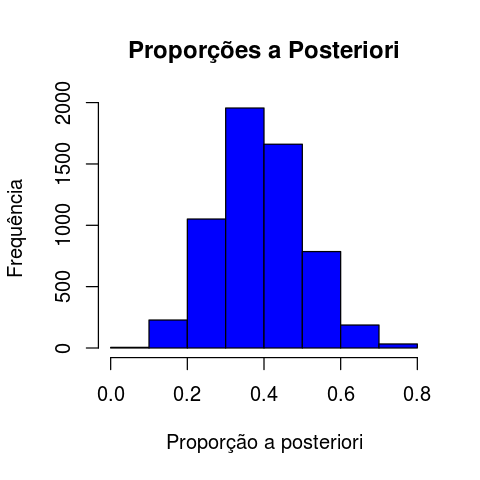

In [25]:
# vamos dar uma olhada na cara na distribuição dos 
# parâmetros a posteriori 
hist(posteriori, main = 'Proporções a Posteriori', 
     xlab = 'Proporção a posteriori',
     ylab = 'Frequência', 
     breaks = 10,
     col = 'blue'
    )

In [26]:
# É mais provável que a proporção de 
# pessoas se inscrevam esteja entre 0.2 e 0.6
# muito mais ainda entre 0.3 e 0.4